In [24]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential

In [25]:
BATCH_SIZE = 30
IMAGE_SIZE = 100
data_dir = os.path.join('data/')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
class_names = train_ds.class_names
print(class_names)

Found 12217 files belonging to 3 classes.
Using 9774 files for training.
Found 12217 files belonging to 3 classes.
Using 2443 files for validation.
['onion', 'orange', 'unknown']


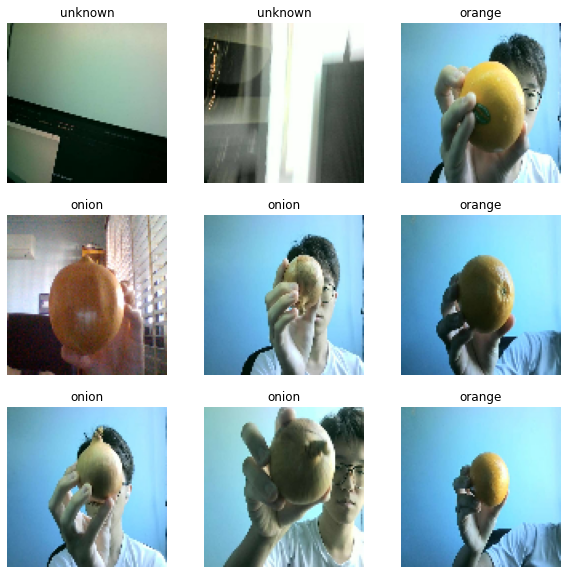

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [27]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [28]:
model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(3, activation = 'softmax'),
])
model.compile(
	optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [29]:
history = model.fit(
	train_ds,
	validation_data = val_ds,
	epochs = 10
)
model.summary()

Epoch 1/10
326/326 [==============================] - 5s 13ms/step - loss: 17.9740 - accuracy: 0.4471 - val_loss: 1.0527 - val_accuracy: 0.4519
Epoch 2/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0380 - accuracy: 0.4586 - val_loss: 1.0310 - val_accuracy: 0.4519
Epoch 3/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0239 - accuracy: 0.4586 - val_loss: 1.0240 - val_accuracy: 0.4519
Epoch 4/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0194 - accuracy: 0.4586 - val_loss: 1.0220 - val_accuracy: 0.4519
Epoch 5/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0181 - accuracy: 0.4586 - val_loss: 1.0215 - val_accuracy: 0.4519
Epoch 6/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0177 - accuracy: 0.4586 - val_loss: 1.0214 - val_accuracy: 0.4519
Epoch 7/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0176 - accuracy: 0.4586 - val_loss: 1.0214 - val_accuracy: 0.451

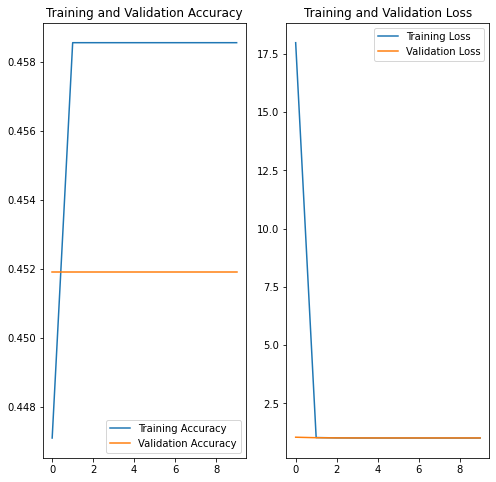

Testing model:
82/82 [==============================] - 0s 4ms/step - loss: 1.0214 - accuracy: 0.4519


In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("Testing model:")
model.evaluate(val_ds)

# saving model as .hdf5
tf.keras.models.save_model(model, 'model.hdf5')